In [1]:
!pip install qiskit qiskit[visualization] qiskit_aer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 77.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 99.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 73.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 8.1 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=0181513c672bc8da835510935da74260b986d935374679b32076d1cc12e0c863
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from qiskit import QuantumCircuit
from qiskit import transpile
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram, plot_bloch_multivector

In [92]:
psi = np.array([[np.sqrt(1/10)], [np.sqrt(2/10) * np.exp(1j*np.pi/3)] , [np.sqrt(3/10) * np.exp(1j*np.pi/4)], [np.sqrt(4/10) * np.exp(1j*np.pi/5)]] )
print(psi)

[[0.31622777+0.j        ]
 [0.2236068 +0.38729833j]
 [0.38729833+0.38729833j]
 [0.51166727+0.37174803j]]


In [93]:
np.matmul(np.transpose(np.conjugate(psi)),psi)

array([[1.+0.j]])

In [94]:
u = [[1], [0], [0], [0]]

In [95]:
UH = np.identity(4)-np.matmul(u-psi,np.transpose(np.conjugate(u-psi)))/(1-psi[0,0])

In [96]:
np.shape(UH)

(4, 4)

In [97]:
np.matmul(np.transpose(np.conjugate(UH)),UH)

array([[ 1.00000000e+00+0.00000000e+00j, -2.77555756e-17+1.10425991e-16j,
         6.93889390e-18+2.77555756e-17j, -5.55111512e-17-8.32667268e-17j],
       [-2.77555756e-17-1.10425991e-16j,  1.00000000e+00+0.00000000e+00j,
         8.32667268e-17+2.77555756e-17j,  5.55111512e-17+0.00000000e+00j],
       [ 6.93889390e-18-2.77555756e-17j,  8.32667268e-17-2.77555756e-17j,
         1.00000000e+00+0.00000000e+00j,  1.11022302e-16-5.55111512e-17j],
       [-5.55111512e-17+8.32667268e-17j,  5.55111512e-17+0.00000000e+00j,
         1.11022302e-16+5.55111512e-17j,  1.00000000e+00+0.00000000e+00j]])

In [98]:
np.matmul(UH,UH)

array([[ 1.00000000e+00+0.00000000e+00j, -2.77555756e-17+1.10425991e-16j,
         6.93889390e-18+2.77555756e-17j, -5.55111512e-17-8.32667268e-17j],
       [-2.77555756e-17-1.10425991e-16j,  1.00000000e+00+0.00000000e+00j,
         8.32667268e-17+2.77555756e-17j,  5.55111512e-17+0.00000000e+00j],
       [ 6.93889390e-18-2.77555756e-17j,  8.32667268e-17-2.77555756e-17j,
         1.00000000e+00+0.00000000e+00j,  1.11022302e-16-5.55111512e-17j],
       [-5.55111512e-17+8.32667268e-17j,  5.55111512e-17+0.00000000e+00j,
         1.11022302e-16+5.55111512e-17j,  1.00000000e+00+0.00000000e+00j]])

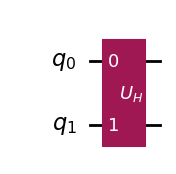

In [99]:
qcUH = QuantumCircuit(2)
qcUH.unitary(UH, [0,1], label='$U_H$')
qcUH.draw('mpl')

In [100]:
gaUH=qcUH.to_gate(label='$U_H$')
gaCUH=gaUH.control(label='CUH')

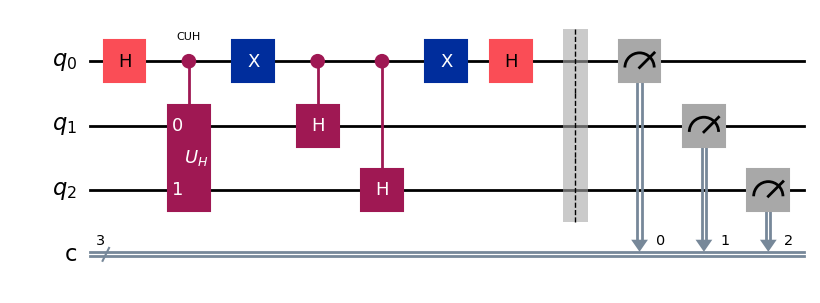

In [118]:
qc = QuantumCircuit(3,3)
qc.h(0)
qc.append(gaCUH, [0, 1, 2])
qc.x(0)
qc.ch(0 ,1)
qc.ch(0 ,2)
qc.x(0)
qc.h(0)
qc.barrier()
qc.measure(range(3), range(3))
qc.draw('mpl')

In [123]:
backend = AerSimulator()
tran_qc = transpile(qc, backend=backend)
shots = 1000000
result = backend.run(tran_qc, shots=shots).result()
counts = result.get_counts()
counts

{'001': 8455,
 '100': 234153,
 '010': 167465,
 '000': 166543,
 '101': 40725,
 '111': 34814,
 '011': 57010,
 '110': 290835}

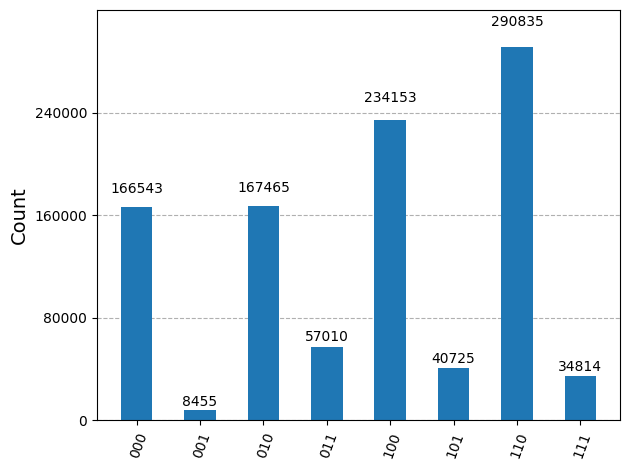

In [124]:
plot_histogram(counts)

In [125]:
p000=counts['000']/shots
p001=counts['001']/shots
p010=counts['010']/shots
p011=counts['011']/shots
p100=counts['100']/shots
p101=counts['101']/shots
p110=counts['110']/shots
p111=counts['111']/shots

In [126]:
alpha1=np.sqrt(2*(p000+p001-1/8))
phi1=np.arccos(2*(p000-p001)/alpha1)
alpha2=np.sqrt(2*(p010+p011-1/8))
phi2=np.arccos(2*(p010-p011)/alpha2)
alpha3=np.sqrt(2*(p100+p101-1/8))
phi3=np.arccos(2*(p100-p101)/alpha3)
alpha4=np.sqrt(2*(p110+p111-1/8))
phi4=np.arccos(2*(p110-p111)/alpha4)

In [127]:
2*(p000-p001)/alpha1

np.float64(0.999856298807349)

In [128]:
print(alpha1, psi[0])
print(phi1, np.angle(psi[0]))

0.31622144139827074 [0.31622777+0.j]
0.016953149232810234 [0.]


In [129]:
import pandas as pd

In [130]:
datavec = {'alphaq': [alpha1, alpha2, alpha3, alpha4], 'alphat':np.abs(psi.flatten()),
           'phiq': [phi1, phi2, phi3, phi4], 'phit':np.angle(psi.flatten())}

In [131]:
df = pd.DataFrame(data=datavec)

In [132]:
df

,alphaq,alphat,phiq,phit
0,0.316221,0.316228,0.016953,0.000000
1,0.446038,0.447214,1.052649,1.047198
2,0.547500,0.547723,0.786134,0.785398
3,0.633481,0.632456,0.629539,0.628319


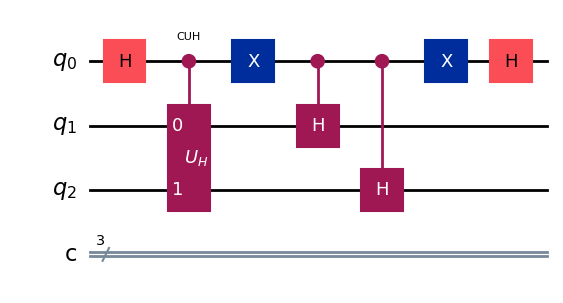

In [133]:
qc = QuantumCircuit(3,3)
qc.h(0)
qc.append(gaCUH, [0, 1, 2])
qc.x(0)
qc.ch(0 ,1)
qc.ch(0 ,2)
qc.x(0)
qc.h(0)
qc.draw('mpl')

In [134]:
Statevector(qc)

Statevector([ 0.40811388+2.89485797e-16j,  0.09188612-2.89485797e-16j,
              0.3618034 +1.93649167e-01j,  0.1381966 -1.93649167e-01j,
              0.44364917+1.93649167e-01j,  0.05635083-1.93649167e-01j,
              0.50583364+1.85874017e-01j, -0.00583364-1.85874017e-01j],
            dims=(2, 2, 2))
